In [10]:
import sys
sys.path.append('../src')
from Params import *
from PlotFuncs import *
from Like import *
from AxionFuncs import *

In [44]:
B_rad=5e3
B_tach=50.0
B_outer=3.0


B_rad_max = 3e7*1e-4
B_rad_min = 2e6*1e-4
print('B_rad between',B_rad_min,B_rad_max,'T')

B_tach_max = B_tach*1
B_tach_min = 1e5*1e-4
print('B_tach between',B_tach_min,B_tach_max,'T')

B_outer_max = 4e4*1e-4
B_outer_min = 3e4*1e-4
print('B_outer between',B_outer_min,B_outer_max,'T')

B_rad between 200.0 3000.0 T
B_tach between 10.0 50.0 T
B_outer between 3.0 4.0 T


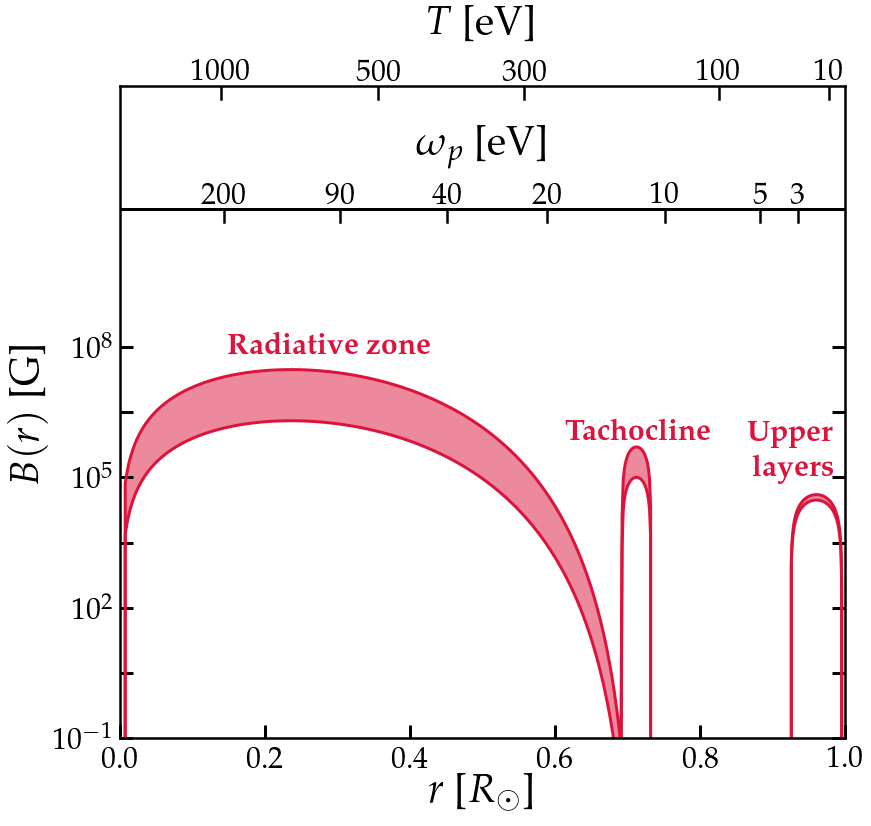

In [45]:
lfs = 40
tfs = 30
fig,ax = MySquarePlot(r'$r$ [$R_\odot$]','$B(r)$ [G]',size_x=13,lfs=lfs,tfs=tfs)

Bcol = 'crimson'

B_max = B_model_seismic(B_rad=B_rad_max,B_tach=B_tach_max,B_outer=B_outer_max)
B_min = B_model_seismic(B_rad=B_rad_min,B_tach=B_tach_min,B_outer=B_outer_min)
plt.semilogy(r,1e4*B_max,lw=3,color=Bcol)
plt.semilogy(r,1e4*B_min,lw=3,color=Bcol)
plt.fill_between(r,1e4*B_max,1e4*B_min,color=Bcol,alpha=0.5)




plt.yticks(logspace(-1,8,7))
ax.tick_params(which='major',top=False,width=3)
ax.tick_params(which='minor',top=False)

wp_vals = array([200,90,40,20,10,5,3])/1000.0
ntx = size(wp_vals)
ymax = 1.5e11
col_ax = 'k'
for i in range(ntx):
    i_r = argmin(abs(wp_vals[i]-wp))
    ax.plot([r[i_r],r[i_r]],[ymax,ymax/2],color=col_ax,lw=2.5)
    plt.text(r[i_r]*1.0,ymax*1.4,str(int(wp_vals[i]*1000)),fontsize=tfs,color='k',rotation=0,rotation_mode='anchor',ha='center')
    plt.plot([0,1],[ymax,ymax],'-',color=col_ax,zorder=2,alpha=1,lw=2.5)
plt.text(0.5,ymax*13,r'$\omega_p$ [eV]',color='k',ha='center',fontsize=lfs)

T_vals = array([1000,500,300,100.0,10])/1000
ntx = size(T_vals)
ymax = 1e14
col_ax = 'k'
for i in range(ntx):
    i_r = argmin(abs(T_vals[i]-T))
    ax.plot([r[i_r],r[i_r]],[ymax,ymax/2],color=col_ax,lw=2.5)
    plt.text(r[i_r]*1.0,ymax*1.4,str(int(T_vals[i]*1000)),fontsize=tfs,color='k',rotation=0,rotation_mode='anchor',ha='center')
plt.text(0.5,ymax*15,r'$T$ [eV]',color='k',ha='center',fontsize=lfs)


plt.xlim(left=0,right=1)
plt.ylim(top=1e14,bottom=1e-1)

plt.gcf().text(0.24,0.57,r'{\bf Radiative zone}',color=Bcol)
plt.gcf().text(0.6,0.47,r'{\bf Tachocline}',color=Bcol)
plt.gcf().text(0.795,0.47,r'{\bf Upper}',color=Bcol)
plt.gcf().text(0.8,0.43,r'{\bf layers}',color=Bcol)


MySaveFig(fig,'Bfield')


In [136]:
T/K_2_keV

array([1.573344e+07, 1.571496e+07, 1.569648e+07, ..., 4.687692e+03,
       4.687413e+03, 4.687216e+03])

In [ ]:
from scipy.integrate import cumtrapz
fig,ax = MySquarePlot('$E_\gamma$ [keV]','$N_\gamma(E^\prime_\gamma<E_\gamma)$')



m_a = 1.0e-4

i_r_min = 1400

E_min = wp[i_r_min]
E_max = wp[0]

rmin = r[i_r_min]
rmax = r[0]


cols = cm.rainbow(linspace(0,1,6))


Nmin = 5

ymax = 1e10
ymin = 7e-3
rs = zeros(shape=6)
ii = 0
for col,Eres in zip(cols,[1e-3,2e-3,4e-3,10e-3,20e-3,70e-3]):
    Ei = logspace(log10(1.0e-3),log10(E_max),1200)
    Flux10_1 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic())
    dN = PhotonNumber_gag(Ei,Flux10_1,1e-6,g=1e-10,Eres=Eres)
    N = cumtrapz(dN,Ei)

    i_min = argmin(abs(Ei-3*Eres))
    plt.plot([3*Eres,3*Eres],[5.0,ymax],'-',lw=1.5,color=col)
    
    rs[ii] = 5.0/N[i_min]
    
    plt.loglog(Ei[0:-1],N*rs[ii],lw=3,path_effects=path_effects,label=str(int(Eres*1000)),color=col)
    ii += 1

plt.xlim(right=E_max)

ax.tick_params(which='major',top=False)
ax.tick_params(which='minor',top=False)


gscale = (rs*(1e-10)**4.0)**(1/4)


r_vals = [0.95,0.9,0.8,0.6,0.5,0.4,0.3,0.2,0.1]
for ri in r_vals:
    i_r = argmin(abs(r-ri))
    ax.plot([wp[i_r],wp[i_r]],[ymax,ymax/2],color='k')
    plt.text(wp[i_r]*1.0,ymax*2,str(ri),fontsize=25,color='k',rotation=0,rotation_mode='anchor',horizontalalignment='center')

plt.title('$r$ [$R_\odot$]',pad=50,fontsize=40)
plt.ylim(top=ymax,bottom=ymin)
    
leg = plt.legend(fontsize=30,frameon=True,title=r'$E_{\rm res}$ [eV]',loc="center",framealpha=1,edgecolor='k',labelspacing=0.2,bbox_to_anchor=(0.12,0.76))
plt.setp(leg.get_title(),fontsize=30)
leg.get_frame().set_linewidth(2.5)

In [34]:
from scipy.special import legendre

costh = linspace(-1,1,100)
dB = legendre(2)(costh)
dB = gradient(dB,arccos(costh))

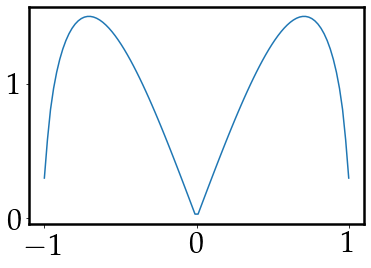

In [35]:
plt.plot(costh,abs(dB))

In [36]:
trapz(abs(dB),costh)

1.9996036990563169

In [37]:
from scipy.stats import chi2

In [43]:
chi2.cdf(1.64**2,df=1)

0.8989948330517918